In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 读取两个数据集
选择了 `所有学员的IP使用情况` 和 `所有学员的OPENID使用情况` 两个数据集,因为这两个数据集都包含了 `_id` 字段，可以通过 `_id` 字段将两个数据集连接起来。

In [6]:
f1 = '../../data/周一所获数据/所有学员的IP使用情况.csv'
f2 = '../../data/周一所获数据/所有学员的OPENID使用情况.csv'

df_ip = pd.read_csv(f1, dtype={'_id': 'string', 'ipCount': 'int'})
df_openid = pd.read_csv(f2, dtype={'openIdCount': 'int64', 'openIds': 'string'})

# 将 'ips' 字段转换为数组类型 
df_ip['ips'] = df_ip['ips'].apply(lambda x: x.split(','))

In [7]:
# 查看数据
df_ip.shape  # (11211, 3)
df_openid.shape  # (11218, 3)

(11218, 3)

# 按照 id 列连接两个数据集

In [11]:
df = pd.merge(df_ip, df_openid, on='_id', how='inner')

只保留 `ipCount`, `openIdCount` 两列

In [22]:
# 只保留 `ipCount`, `openIdCount` 两列.并保存为 csv 文件
df = df[['_id', 'ipCount', 'openIdCount']]
df.to_csv('./所有学员的IP和OPENID使用情况.csv', index=False)

In [16]:
df.shape
df.head(100)

,_id,ipCount,ips,openIdCount,openIds
0,018f72e710a811ec8871b07b25146e9e,50,"[220.178.83.37, 220.178.4.215, 60.168.154.3, 1...",3,"oR17p5bl9H52pGZ8ZSrR0GEHwd4k,oR17p5bwvhrRJgS9Q..."
1,6f88968110c911ec8216b07b25146e9e,25,"[112.32.176.159, 112.32.178.196, 112.32.181.98...",4,"oR17p5Z8_6HzA_SwAlDl13CwhUyM,oR17p5cUgiRO5HPkz..."
2,991036f110a911ec8871b07b25146e9e,25,"[36.113.65.177, 36.113.68.50, 36.113.115.169, ...",3,"oR17p5Sghf_BeodRYKr1eKgRHSmk,oR17p5Ul72hZHCSCm..."
3,8c94bab110a911ec8871b07b25146e9e,24,"[36.161.67.80, 183.165.228.97, 114.103.68.21, ...",1,oR17p5c0ROkwFj9hVvDC73Ro_whc
4,423d3e1210a911ec8871b07b25146e9e,21,"[36.7.131.45, 220.178.83.41, 220.178.83.45, 11...",1,oR17p5To2ZvbXp_RQGS95qKMNM9c
...,...,...,...,...,...
95,bb47779110a811ec8871b07b25146e9e,9,"[47.99.99.5, 36.33.4.66, 58.243.43.102, 36.33....",1,oR17p5fUeN_lgG-26_eVzORuNAIs
96,776da7808cf011edb6a3fa164011f743,9,"[36.62.132.57, 36.62.133.81, 36.62.133.164, 36...",1,oR17p5QOdLkVjljZskwNkqE5Lk_s
97,9951743810a911ec8871b07b25146e9e,9,"[120.242.16.49, 47.104.203.201, 120.242.17.211...",1,oR17p5dXB4isSq5uQF24ANIuh0Ss
98,0b372a0067bc11ecb369fa164011f743,9,"[121.225.210.120, 180.111.186.236, 222.95.34.1...",1,oR17p5Siy0iKqGPF5BOEIQ2rJerU


# 数据量纲不一致，需要对数据进行归一化处理

# 3. 绘制图表

In [13]:
# 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

### (1) 按照 IP 数量和 OpenID 数量绘制散点图

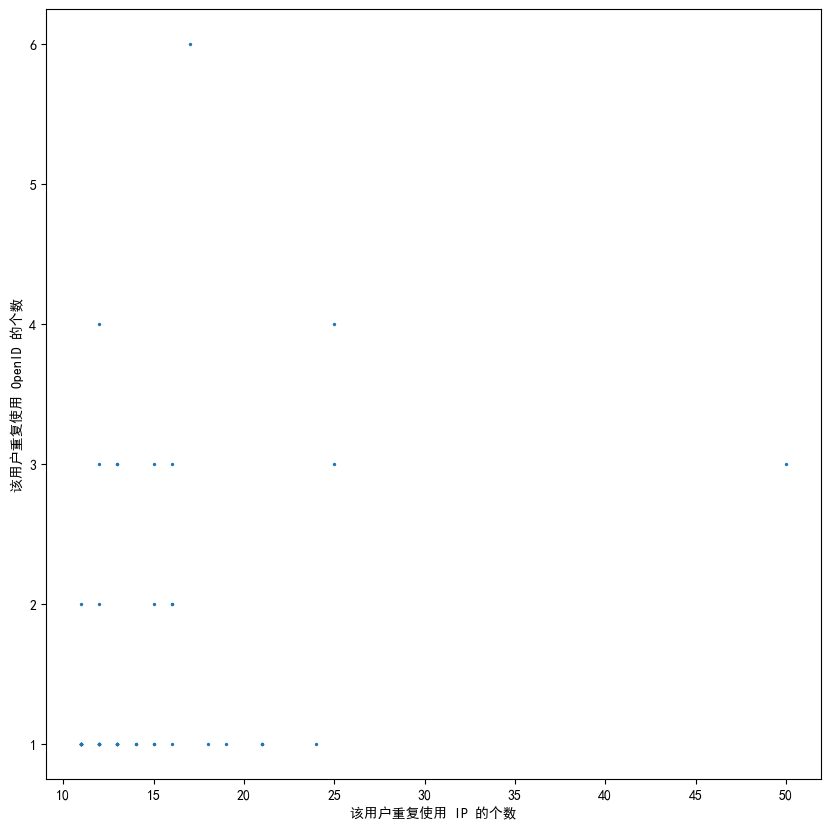

In [29]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

total_rows = df.shape[0]
total_rows = 50

# x 轴不需要打印每一条 id，只需要打印刻度
ax.scatter(df.head(total_rows).ipCount,
           df.head(total_rows).openIdCount,
           s=2)

# 设置标题
ax.set_xlabel('该用户重复使用 IP 的个数')
ax.set_ylabel('该用户重复使用 OpenID 的个数')

# 设置 x 轴刻度
# ticks = np.arange(0, total_rows, 1000)
# labels = [f"{df_grouped['latestEndTime'].iloc[t]}" for t in ticks if t < total_rows] # 只打印几个时间戳作为刻度
# plt.xticks(rotation=45,fontsize=8)

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 100, 5))

# plt.savefig('./imgs/所有学员的重复使用的 IP 个数和 OpenID 个数.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

In [ ]:

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)